In [1]:
import os
from datetime import datetime, timedelta
import string
from enum import Enum
import mlflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.patches as patches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import geopandas

from test_case_utils import WeatherParams, TestCase, TargetCases, MlflowConfig
from geo_plot_utils import create_geo_plot, save_geo_plots, interpolate, TargetManilaErea, create_img_from_griddata

/home/akira/anaconda3/envs/poteka-pipeline-pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.style.use('seaborn-bright')

In [3]:
lonlats = [
(14.6471, 121.0721),
(14.5987, 121.0892),
(14.5414, 121.1156),
(14.5837, 121.0061),
(14.4896, 121.0521),
(14.6705, 120.9974),
(14.6706, 120.9552),
(14.5141, 121.0044),
(14.7409, 120.9899),
(14.6934, 120.9683),
(14.4778, 120.9799),
(14.4331, 120.9844),
(14.6297, 120.9687),
(14.5729, 121.0974),
(14.5702, 121.0818),
(14.5447, 120.9893),
(14.7134, 121.0009),
(14.6509, 120.9475),
(14.5917, 120.9815),
(14.4119, 121.0522),
(14.3961, 120.9398),
(14.6040, 121.0406),
(14.5467, 121.0666),
(14.5769, 121.0335),
(14.4575, 121.0513),
(14.5354, 121.0412),
(14.5107, 121.0358),
(14.3836, 121.0337),
(14.6449, 121.0444),
(14.4728, 121.0185),
(14.6589, 121.0298),
(14.7192, 121.0285),
(14.4599, 120.9320),
(14.6857, 121.0646),
(14.7199, 121.0706),
(14.3968, 120.9744),
(14.7073, 120.9445),
(14.6346, 121.0857),
(14.5745, 121.0415),
(14.5763, 121.2651),
(14.5734, 121.099)
]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


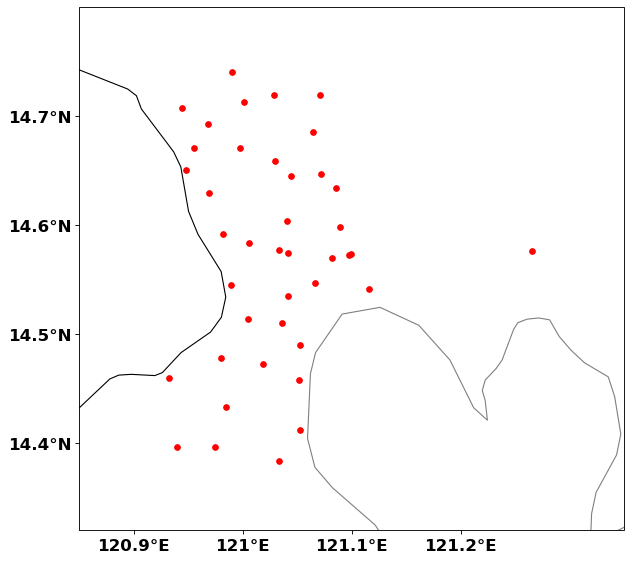

In [40]:
import cartopy

fig = plt.figure(figsize=(8, 8), dpi=80)
projection = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent(
    [
        120.85,
        121.35,
        14.32,
        14.80,
    ],
    crs=projection,
)
for yx in lonlats:
    ax.plot(yx[1], yx[0], marker='.', color='red', markersize=10)
ax.add_feature(cfeature.LAKES, alpha=0.5, facecolor='none', edgecolor='black')
ax.coastlines(resolution='10m')
ax.set_xticks([120.9, 121.0, 121.1, 121.2], crs=projection)
ax.set_yticks([14.4, 14.5, 14.6, 14.7], crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
for obj in ax.get_xticklabels():
    obj.set_fontweight('bold')
    obj.set_fontsize(15)
for obj in ax.get_yticklabels():
    obj.set_fontweight('bold')
    obj.set_fontsize(15)

plt.tight_layout()
plt.savefig('poteka-distribution-map.eps', format='eps', bbox_inches='tight')
plt.show()
plt.close()